In [20]:
import pandas as pd
from pathlib import Path
import os
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

## Objective
* Let's Use the `pandas` Python Library to Explore some NHA Data

## NHA passed along 7 files

In [8]:
path = Path.cwd()
files_loc = path.parent / 'data' / 'NHA_files/'
files = [file for file in files_loc.iterdir()]
for i, file in enumerate(files):
    print(i,file)

0 /Users/user/Box/Teaching (CMU)/Intro to DH/F21 Intro to DH/dh/data/NHA_files/ALA grantee libraries-for NHA.xlsx
1 /Users/user/Box/Teaching (CMU)/Intro to DH/F21 Intro to DH/dh/data/NHA_files/Copy of SI and Landmarks Participants FOIA Request.xlsx
2 /Users/user/Box/Teaching (CMU)/Intro to DH/F21 Intro to DH/dh/data/NHA_files/NEHontheRoad.xlsx
3 /Users/user/Box/Teaching (CMU)/Intro to DH/F21 Intro to DH/dh/data/NHA_files/Preservation Sites.xlsx
4 /Users/user/Box/Teaching (CMU)/Intro to DH/F21 Intro to DH/dh/data/NHA_files/Public Programs 2015-2019.xlsx
5 /Users/user/Box/Teaching (CMU)/Intro to DH/F21 Intro to DH/dh/data/NHA_files/Seminars, Institutes, and Landmarks Locations - Cleaned for Map.csv
6 /Users/user/Box/Teaching (CMU)/Intro to DH/F21 Intro to DH/dh/data/NHA_files/Seminars, Institutes, and Landmarks Locations - Cleaned.csv


## We're going to use pandas `read_excel` and `read_csv` functions.  

For more, don't forget you can always run `?pd.read_excel` or `?pd.read_csv` to see the documentation

In [9]:
df0 = pd.read_excel(str(files_loc) + '/ALA grantee libraries-for NHA.xlsx')
df0.head(10)

,ID,Source/System,Project,Institution,Institution Type,City,State,ZIP,Multi?
0,248.0,ALA Apply,Bridging Cultures Bookshelf: Muslim Journeys,Cordova Public Library,public_library_single,Cordova,AK,99574-1170,N
1,3400.0,ALA Apply,Shakespeare and His First Folio: A Traveling E...,"Alaska State Libraries, Archives, and Museums",other,Juneau,AK,99801-1718,N
2,6228.0,ALA Apply,"GSC-Hack the Feed: Media, Resistance, Revolution",Juneau Public Libraries,public_library,Juneau,AK,99801-1361,N
3,8658.0,ALA Apply,GSC-Structures of Suffering: Origins of Teen V...,Juneau Public Library,public_library,Juneau,AK,99801-1361,N
4,8390.0,ALA Apply,GSC-The Art of Change,Juneau Public Library,public_library,Juneau,AK,99801-1361,N
5,11941.0,ALA Apply,Revisiting the Founding Era,Ketchikan Public Library,NaN,Ketchikan,AK,99901-6250,N
6,10660.0,ALA Apply,"The Vietnam War, A Film by Ken Burns and Lynn ...",Ketchikan Public Library,public_library_single,Ketchikan,AK,99901-6250,N
7,8727.0,ALA Apply,GSC-Structures of Suffering: Origins of Teen V...,Public Library of Anniston-Calhoun County,public_library,Anniston,AL,36201-5662,N
8,1306.0,ALA Apply,Bridging Cultures Bookshelf: Muslim Journeys,Avondale Regional Library,NaN,Birmingham,AL,35222-3309,Y
9,1045.0,ALA Apply,Bridging Cultures Bookshelf: Muslim Journeys,Birmingham-Southern College,academic_library,Birmingham,AL,35254-0001,N


## It's often helpful just to know many of something there are in a column 

So let's take the `Project` column and see how many times different things appear.  We can do that telling which column to look at `df0['Project']` and then using the `value_counts()` method on that object.

Then we can try it on a different column. 


In [10]:
df0['Project'].value_counts()

Bridging Cultures Bookshelf: Muslim Journeys                                                                         843
Latino Americans: 500 Years of History                                                                               203
Let's Talk About It: Muslim Journeys                                                                                  99
Revisiting the Founding Era                                                                                           96
GSC-What Makes a Hero? Self, Society and Rising to the Occasion                                                       79
GSC-Structures of Suffering: Origins of Teen Violence and Suicide                                                     75
GSC-The Art of Change                                                                                                 75
GSC-Empathy: The Cost of Switching Sides                                                                              67
Shakespeare and His First Folio:

In [11]:
df0['Institution'].value_counts()

Ypsilanti District Library                              7
Poughkeepsie Public Library District                    6
University City Public Library                          6
City of Commerce Public Library                         5
Los Angeles Public Library                              5
                                                       ..
Great River Regional Library - Monticello Branch        1
Berkshire Community College                             1
State College of Florida, Manatee-Sarasota              1
Ovitt Family Community Library, Ontario City Library    1
Camden County College                                   1
Name: Institution, Length: 1453, dtype: int64

## Use the cell below to count the values in another column of your choosing.

## To make this prettier and more legible, there's this trick using `pd.DataFrame()`

`pd.DataFrame(df0['Project'].value_counts())`

In [12]:
pd.DataFrame(df0['Project'].value_counts())

,Project
Bridging Cultures Bookshelf: Muslim Journeys,843
Latino Americans: 500 Years of History,203
Let's Talk About It: Muslim Journeys,99
Revisiting the Founding Era,96
"GSC-What Makes a Hero? Self, Society and Rising to the Occasion",79
GSC-Structures of Suffering: Origins of Teen Violence and Suicide,75
GSC-The Art of Change,75
GSC-Empathy: The Cost of Switching Sides,67
Shakespeare and His First Folio: A Traveling Exhibition,52
American Creed: Community Conversations,50


## Maybe it'd be nice to see a little chart

We can do with with the little `plot()` function built into pandas

<AxesSubplot:>

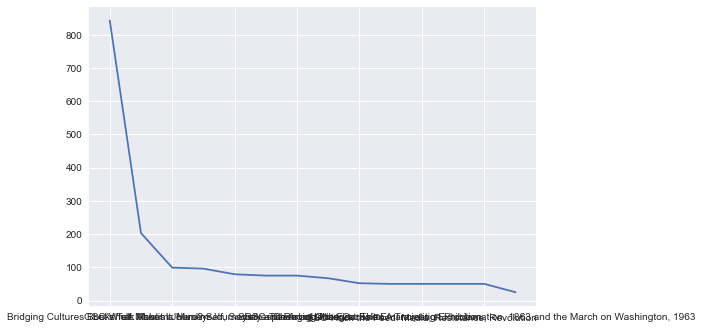

In [21]:
counts = df0['Project'].value_counts()
counts.plot()

## Oh, hmm

This is handy to have for certain kinds of data, but what we really want here is somepthing like a horizontal bar chart so let's tell pandas that by saying `counts.plot(kind='barh')`

<AxesSubplot:>

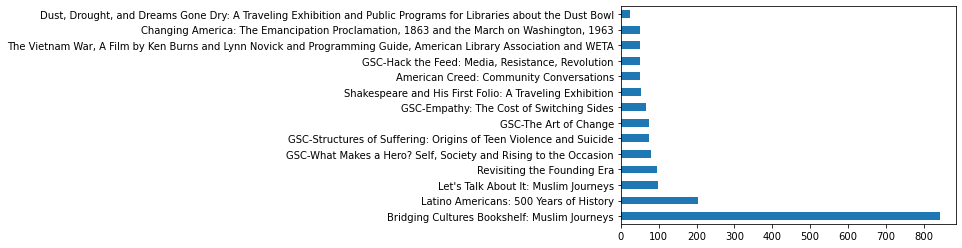

In [14]:
counts.plot(kind='barh')

### How else could we plot that data? 

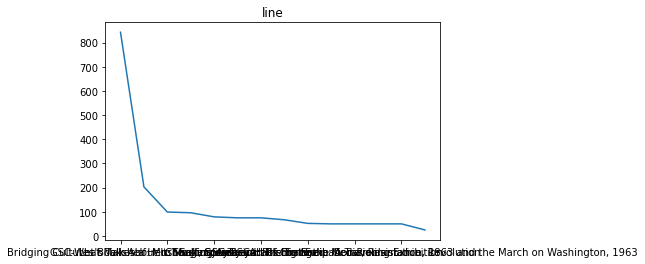

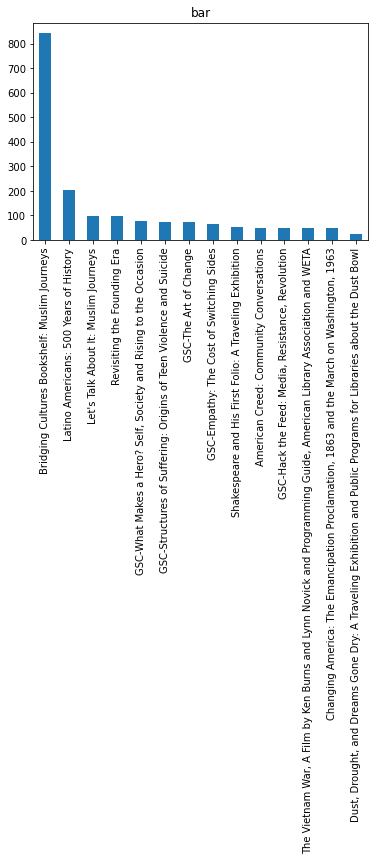

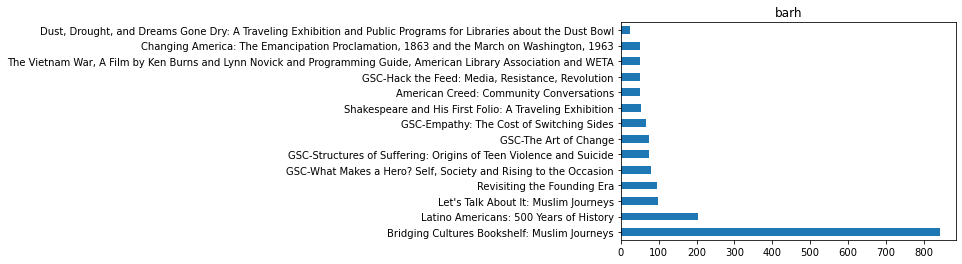

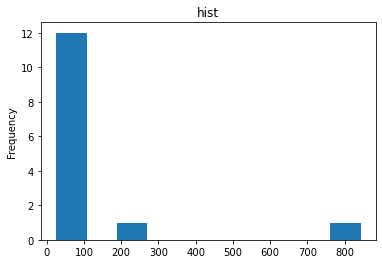

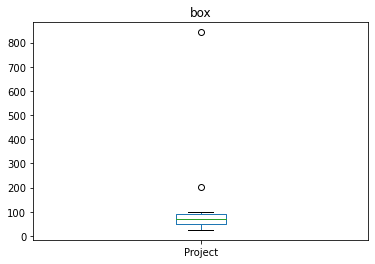

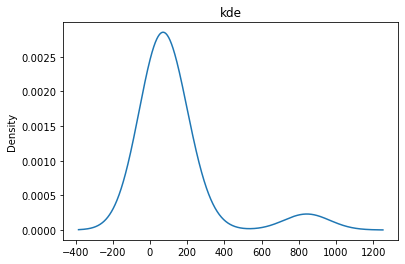

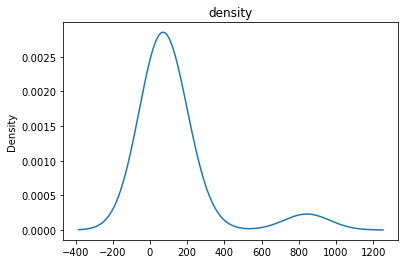

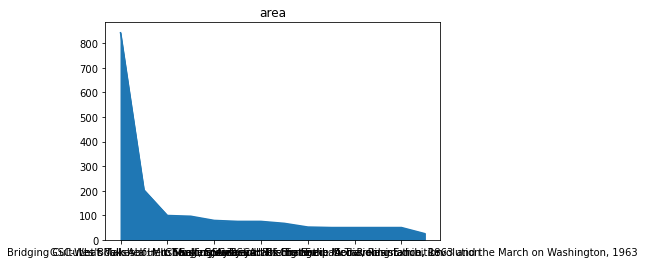

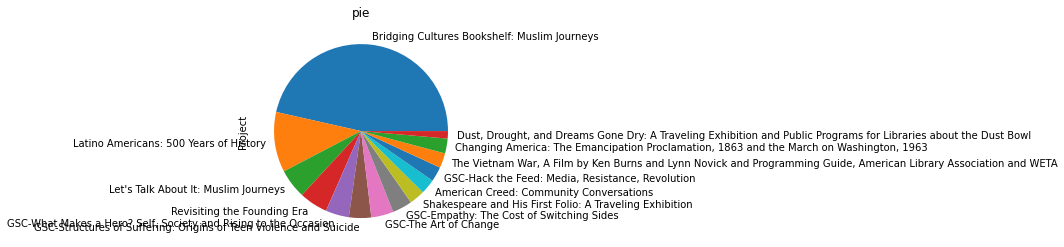

In [19]:
plot_kinds = ['line', 'bar' , 'barh' , 'hist' , 'box' ,'kde' ,'density', 'area' ,'pie']
for kind in plot_kinds:
    plt.figure()
    counts.plot(kind=kind, title=kind)
    

## Now that we know how to do that, we can loop through all of the colums

In [ ]:
for column in df0.columns:
    plt.figure()
    print(column)
    counts = df0[column].value_counts()
    try:
        counts = counts.iloc[0:15]
        print(counts.iloc[0:15])
        print('####################')
        print()
        counts.plot(kind='barh', title=column)
        plt.show()
    except:
        print('nothing to plot')

## That seems useful!  Let's turn it into a function!


In [ ]:

def plot_each_column(pandas_dataframe):
    for column in pandas_dataframe.columns:
        plt.figure()
        print(column)
        counts = pandas_dataframe[column].value_counts()
        counts = counts.iloc[0:15]
        print(counts.iloc[0:15])
        print('####################')
        print()
        try:
            counts.plot(kind='barh', title=column)
            plt.show()
        except:
            print('nothing to plot')


In [ ]:
df1 = pd.read_excel(str(files_loc) + '/Copy of SI and Landmarks Participants FOIA Request.xlsx')
df1.head()

In [ ]:
plot_each_column(df1)

In [ ]:
df2 = pd.read_excel(str(files_loc) + '/NEHontheRoad.xlsx')
df2.head()

In [ ]:
plot_each_column(df2)

In [ ]:
df3 = pd.read_excel(str(files_loc) + '/Preservation Sites.xlsx')
df3.head()

In [ ]:
plot_each_column(df3)

In [ ]:
df4 = pd.read_excel(str(files_loc) + '/Public Programs 2015-2019.xlsx')
df4.head()

In [ ]:
df5 = pd.read_csv(str(files_loc) + '/Seminars, Institutes, and Landmarks Locations - Cleaned for Map.csv')
df5.head()




In [ ]:
plot_each_column(df5)

In [ ]:
df6 = pd.read_csv(str(files_loc)+'/Seminars, Institutes, and Landmarks Locations - Cleaned.csv')
df6.head()

## YOUR CHALLENGE

In the cell below, see if you can write three lines of code that will run our `plot_each_column()` function on all of our dataframes.